In [1]:
# Importing necessary libraries. Other required libraries are imported wherever required.

import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np

In [2]:
# Reading csv file using pandas.
file_1 = pd.read_csv("recipes_82k.csv")

In [3]:
# Converting data to Pandas DataFrame
df = pd.DataFrame(file_1)

In [4]:
df.shape

(82245, 9)

In [5]:
df.head()

,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags
0,NaN,['Set the racks in the middle and upper thirds...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['1 tablespoons extra virgin olive oil', '1 cu...",20 minutes,Mediterranean Sea Bass,4 servings,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri..."
1,NaN,['Place the eggs in the air fryer basket and c...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['4 large eggs', 'Salt (black pepper, everythi...",15 minutes,Air Fryer Hard Boiled Eggs,4 eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke..."
2,NaN,"['Air Fryer directions:', 'Preheat air fryer t...",['American'],https://www.skinnytaste.com/wp-content/uploads...,"['olive oil spray', '4 about 5 ounce each salm...",5 minutes,Air Fryer Basil-Parmesan Salmon,4 servings,"Air Fryer Recipes, Gluten Free, Keto Recipes, ..."
3,NaN,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['American'],https://www.skinnytaste.com/wp-content/uploads...,['1/2 cup freshly grated Parmesan (not pre-gra...,15 minutes,Everything Parmesan Crisps,4 servings,"Gluten Free, Keto Recipes, Kid Friendly, Low C..."
4,NaN,['Cook potatoes in a large pot of salted water...,['American'],https://www.skinnytaste.com/wp-content/uploads...,['3 1/2 pounds new potatoes (about 10 peeled a...,10 minutes,Potato and Green Bean Salad,12 servings,"Dairy Free, Gluten Free, Kid Friendly, Vegetar..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82245 entries, 0 to 82244
Data columns (total 9 columns):
category          18107 non-null object
cooking_method    82245 non-null object
cuisine           82230 non-null object
image             82245 non-null object
ingredients       82245 non-null object
prep_time         58630 non-null object
recipe_name       82245 non-null object
serves            82244 non-null object
tags              82011 non-null object
dtypes: object(9)
memory usage: 5.6+ MB


In [7]:
# Dropping duplicate rows
print('Dupplicate entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Dupplicate entries: 9336


In [8]:
# Category column is found to be empty.
df.category.value_counts()

[]    18035
Name: category, dtype: int64

In [9]:
# Dropping unnecessary features, or those features which seems to have very less influence. This will help improve computation speed.
df.drop(columns=['category', 'image', 'cooking_method', 'serves','cuisine'], inplace=True)

In [10]:
df = df.astype(str)

In [11]:
len(df.tags)

72909

In [12]:
# Resetting index as there were gaps when dropped duplicate rows
df.reset_index(drop= True, inplace=True)
df.head()

,ingredients,prep_time,recipe_name,tags
0,"['1 tablespoons extra virgin olive oil', '1 cu...",20 minutes,Mediterranean Sea Bass,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri..."
1,"['4 large eggs', 'Salt (black pepper, everythi...",15 minutes,Air Fryer Hard Boiled Eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke..."
2,"['olive oil spray', '4 about 5 ounce each salm...",5 minutes,Air Fryer Basil-Parmesan Salmon,"Air Fryer Recipes, Gluten Free, Keto Recipes, ..."
3,['1/2 cup freshly grated Parmesan (not pre-gra...,15 minutes,Everything Parmesan Crisps,"Gluten Free, Keto Recipes, Kid Friendly, Low C..."
4,['3 1/2 pounds new potatoes (about 10 peeled a...,10 minutes,Potato and Green Bean Salad,"Dairy Free, Gluten Free, Kid Friendly, Vegetar..."


In [13]:
# Checking null values.
df.isna().sum()

ingredients    0
prep_time      0
recipe_name    0
tags           0
dtype: int64

In [14]:
# Splitting tabs
df['tags'] = df['tags'].apply(lambda x: x.split(','))

In [15]:
# Defining function to strip extra spaces in string.
def l_strip(list):
    list = [item.strip() for item in list]
    return list

In [16]:
# After splitting in Tags column, there are extra spaces in few of them that lead to duplicate tags. So, stripping them of those white spaces.
df['tags'] = df['tags'].apply(lambda x: l_strip(x))

In [17]:
all_tags = [item for sublist in df['tags'].values for item in sublist]

In [18]:
len(all_tags)

645295

In [19]:
# All unique tags. That is found to be 766
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

766

In [20]:
#unique_tags

In [21]:
flat_list = [item for sublist in df['tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

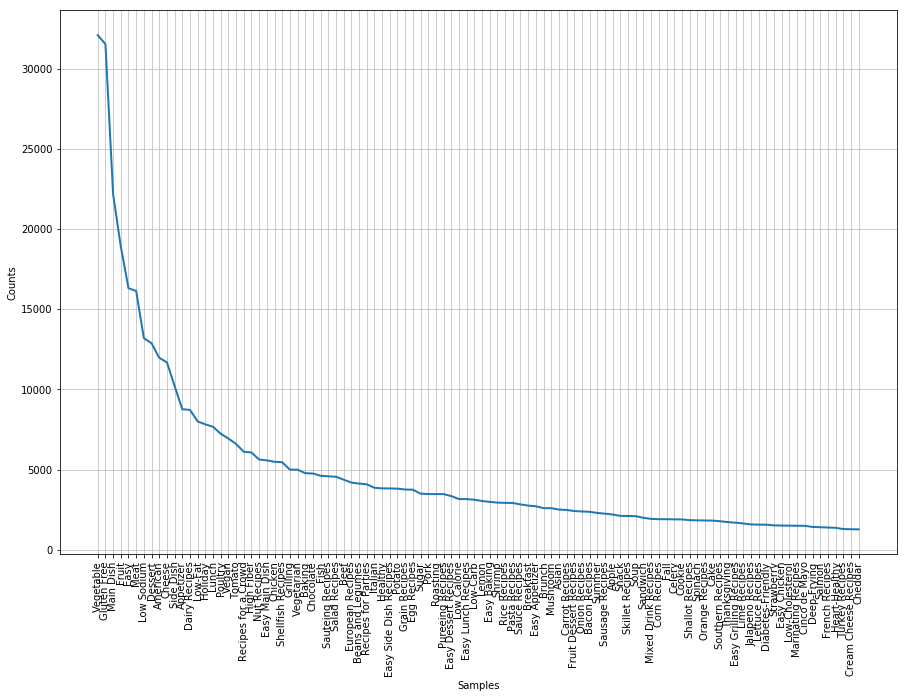

In [22]:
# Plotting the counts of tags.
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

In [23]:
df.head()

,ingredients,prep_time,recipe_name,tags
0,"['1 tablespoons extra virgin olive oil', '1 cu...",20 minutes,Mediterranean Sea Bass,"[Dairy Free, Gluten Free, Keto Recipes, Kid Fr..."
1,"['4 large eggs', 'Salt (black pepper, everythi...",15 minutes,Air Fryer Hard Boiled Eggs,"[Air Fryer Recipes, Dairy Free, Gluten Free, K..."
2,"['olive oil spray', '4 about 5 ounce each salm...",5 minutes,Air Fryer Basil-Parmesan Salmon,"[Air Fryer Recipes, Gluten Free, Keto Recipes,..."
3,['1/2 cup freshly grated Parmesan (not pre-gra...,15 minutes,Everything Parmesan Crisps,"[Gluten Free, Keto Recipes, Kid Friendly, Low ..."
4,['3 1/2 pounds new potatoes (about 10 peeled a...,10 minutes,Potato and Green Bean Salad,"[Dairy Free, Gluten Free, Kid Friendly, Vegeta..."


In [24]:
df.ingredients[0]

"['1 tablespoons extra virgin olive oil', '1 cup chopped yellow onion', '3 cloves garlic (minced)', '1/4 teaspoon crushed red pepper flakes (or to taste)', '1/2 cup chopped fennel', 'One 28 ounce can whole peeled tomatoes (with their juices)', '3/4 cup fresh basil leaves (very thinly sliced)', '1/2 cup dry white wine', '1/4 cup pitted Kalamata olives (halved)', 'Kosher salt', 'Freshly ground pepper', 'Four 4-6 ounce skinless Chilean sea bass fillets (or other sustainable firm white-fleshed fish fillets such as halibut, cod or striped bass)', 'Organic olive oil cooking spray', 'Kosher salt', 'Freshly ground black pepper', '1 tablespoon extra-virgin olive oil']"

In [25]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

In [26]:
stop_words = set(stopwords.words('english'))

In [27]:
# Defining few functions used to clean the data as required by the text.

def t_clean(text):
    text = text.replace(']', '')
    text = text.replace('[', '')
    text = text.replace(',', '')
    text = text.replace("'", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("-", " ")
    text = text.replace("/", "")
    return text
    
def t_split(text):
    text = text.split(' ')
    return text

def l_remove(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list

def rem_sp(list):
    while("" in list):
        list.remove("")
    return list

def s_words(list):
    stop_words = set(stopwords.words('english'))
    filtered_sentence = []
    for w in list:
        if w not in stop_words:
            filtered_sentence.append(w.lower())
    list = filtered_sentence
    return list
    
def l_stem(list):
    list = [stem.stem(item) for item in list]
    return list

def l_keep(list): 
    pattern = '[^0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list

In [28]:
df['ingredients'] = df['ingredients'].apply(lambda x: t_clean(x))

In [29]:
df['ingredients'] = df['ingredients'].apply(lambda x: t_split(x))

In [30]:
df['ingredients'] = df['ingredients'].apply(lambda x: l_remove(x))

In [31]:
df['ingredients'] = df['ingredients'].apply(lambda x: rem_sp(x))

In [32]:
df['ingredients'] = df['ingredients'].apply(lambda x: s_words(x))

In [33]:
df['ingredients'] = df['ingredients'].apply(lambda x: l_stem(x))

In [34]:
df['ingredients'] = df['ingredients'].apply(lambda x: l_strip(x))

In [35]:
df.head()

,ingredients,prep_time,recipe_name,tags
0,"[tablespoon, extra, virgin, oliv, oil, cup, ch...",20 minutes,Mediterranean Sea Bass,"[Dairy Free, Gluten Free, Keto Recipes, Kid Fr..."
1,"[larg, egg, salt, black, pepper, everyth, bage...",15 minutes,Air Fryer Hard Boiled Eggs,"[Air Fryer Recipes, Dairy Free, Gluten Free, K..."
2,"[oliv, oil, spray, ounc, salmon, fillet, skin,...",5 minutes,Air Fryer Basil-Parmesan Salmon,"[Air Fryer Recipes, Gluten Free, Keto Recipes,..."
3,"[cup, freshli, grate, parmesan, pre, grate, us...",15 minutes,Everything Parmesan Crisps,"[Gluten Free, Keto Recipes, Kid Friendly, Low ..."
4,"[pound, new, potato, peel, cut, inch, piec, lb...",10 minutes,Potato and Green Bean Salad,"[Dairy Free, Gluten Free, Kid Friendly, Vegeta..."


In [36]:
df['recipe_name'] = df['recipe_name'].apply(lambda x: t_clean(x))

In [37]:
df['recipe_name'] = df['recipe_name'].apply(lambda x: t_split(x))

In [38]:
df['recipe_name'] = df['recipe_name'].apply(lambda x: l_remove(x))

In [39]:
df['recipe_name'] = df['recipe_name'].apply(lambda x: rem_sp(x))

In [40]:
df['recipe_name'] = df['recipe_name'].apply(lambda x: s_words(x))

In [41]:
df['recipe_name'] = df['recipe_name'].apply(lambda x: l_stem(x))

In [42]:
df['recipe_name'] = df['recipe_name'].apply(lambda x: l_strip(x))

In [43]:
df.head()

,ingredients,prep_time,recipe_name,tags
0,"[tablespoon, extra, virgin, oliv, oil, cup, ch...",20 minutes,"[mediterranean, sea, bass]","[Dairy Free, Gluten Free, Keto Recipes, Kid Fr..."
1,"[larg, egg, salt, black, pepper, everyth, bage...",15 minutes,"[air, fryer, hard, boil, egg]","[Air Fryer Recipes, Dairy Free, Gluten Free, K..."
2,"[oliv, oil, spray, ounc, salmon, fillet, skin,...",5 minutes,"[air, fryer, basil, parmesan, salmon]","[Air Fryer Recipes, Gluten Free, Keto Recipes,..."
3,"[cup, freshli, grate, parmesan, pre, grate, us...",15 minutes,"[everyth, parmesan, crisp]","[Gluten Free, Keto Recipes, Kid Friendly, Low ..."
4,"[pound, new, potato, peel, cut, inch, piec, lb...",10 minutes,"[potato, green, bean, salad]","[Dairy Free, Gluten Free, Kid Friendly, Vegeta..."


In [44]:
abc = ['5 minutes', '10 minutes', '15 minutes', '20 minutes', '25 minutes', '30 minutes']
def prep_clean(list):
    if list in abc:
        return 'under'
    else:
        return 'over'

In [45]:
# The tags seems to have only 'Under 30 minutes' which is related to prep_time. The perp_time column have data in different formats. But keeping time in mind, it is converted to either under 30 minutes or over 30 minutes.
df['prep_time'] = df['prep_time'].apply(lambda x: prep_clean(x))

In [46]:
df.head()

,ingredients,prep_time,recipe_name,tags
0,"[tablespoon, extra, virgin, oliv, oil, cup, ch...",under,"[mediterranean, sea, bass]","[Dairy Free, Gluten Free, Keto Recipes, Kid Fr..."
1,"[larg, egg, salt, black, pepper, everyth, bage...",under,"[air, fryer, hard, boil, egg]","[Air Fryer Recipes, Dairy Free, Gluten Free, K..."
2,"[oliv, oil, spray, ounc, salmon, fillet, skin,...",under,"[air, fryer, basil, parmesan, salmon]","[Air Fryer Recipes, Gluten Free, Keto Recipes,..."
3,"[cup, freshli, grate, parmesan, pre, grate, us...",under,"[everyth, parmesan, crisp]","[Gluten Free, Keto Recipes, Kid Friendly, Low ..."
4,"[pound, new, potato, peel, cut, inch, piec, lb...",under,"[potato, green, bean, salad]","[Dairy Free, Gluten Free, Kid Friendly, Vegeta..."


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72909 entries, 0 to 72908
Data columns (total 4 columns):
ingredients    72909 non-null object
prep_time      72909 non-null object
recipe_name    72909 non-null object
tags           72909 non-null object
dtypes: object(4)
memory usage: 2.2+ MB


In [48]:
df['ingredients'] = df['ingredients'].apply(lambda x: " ".join(x))
df['recipe_name'] = df['recipe_name'].apply(lambda x: " ".join(x))

### Cleaned data

In [49]:
df.head()

,ingredients,prep_time,recipe_name,tags
0,tablespoon extra virgin oliv oil cup chop yell...,under,mediterranean sea bass,"[Dairy Free, Gluten Free, Keto Recipes, Kid Fr..."
1,larg egg salt black pepper everyth bagel seaso...,under,air fryer hard boil egg,"[Air Fryer Recipes, Dairy Free, Gluten Free, K..."
2,oliv oil spray ounc salmon fillet skin remov l...,under,air fryer basil parmesan salmon,"[Air Fryer Recipes, Gluten Free, Keto Recipes,..."
3,cup freshli grate parmesan pre grate use larg ...,under,everyth parmesan crisp,"[Gluten Free, Keto Recipes, Kid Friendly, Low ..."
4,pound new potato peel cut inch piec lb green b...,under,potato green bean salad,"[Dairy Free, Gluten Free, Kid Friendly, Vegeta..."


### ML

In [50]:
X1 = df['ingredients']
X2 = df['recipe_name']
X3 = df['prep_time']
y = df['tags']

In [51]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [53]:
vectorizer_X = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=5000)

In [54]:
X1_tfidf = vectorizer_X.fit_transform(X1)
X2_tfidf = vectorizer_X.fit_transform(X2)
X3_tfidf = vectorizer_X.fit_transform(X3)

In [55]:
from scipy.sparse import hstack

X_tfidf = hstack([X1_tfidf,X2_tfidf, X3_tfidf])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [57]:
X_tfidf.shape

(72909, 10002)

In [58]:
y_bin.shape

(72909, 766)

In [59]:
#Splitting the data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0)

In [60]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_log_error

In [61]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

In [62]:
for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Clf: ", classifier.__class__.__name__)
    print("RMSLE: {}".format(np.sqrt(mean_squared_log_error(y_test, y_pred))))
    print("---")

Clf:  DummyClassifier
RMSLE: 0.09906568231695445
---
Clf:  SGDClassifier
RMSLE: 0.059797278602972584
---
Clf:  LogisticRegression
RMSLE: 0.05947161771069925
---
Clf:  MultinomialNB
RMSLE: 0.0684413335753354
---
Clf:  LinearSVC
RMSLE: 0.05742126730360791
---
Clf:  Perceptron
RMSLE: 0.06935531522270745
---
Clf:  PassiveAggressiveClassifier
RMSLE: 0.06490798073438919
---


### The Linear SVC is found to be working the best here. Further we can do Grid Search with cross validation to fine tune the hyperparameter.